# A/B Project Context

As an analyst at a big online store I'll be working together with the marketing department.  We have compiled a list of hypotheses that may help boost revenue. As the analyst, I will prioritize these hypotheses, launch an A/B test, and analyze the results. 

Here are the steps that will be taken during this project:

1. Importing required libraries
2. Data processing and cleaning
3. Prioritize Hypotheses
4. A/B Test Analysis


Below is a description of the hypthoses gathered by the marketing department. 
- Add two new channels for attracting traffic. This will bring 30% more users
- Launch your own delivery service. This will shorten delivery time
- Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
- Change the category structure. This will increase conversion since users will find the products they want more quickly
- Change the background color on the main page. This will increase user engagement
- Add a customer review page. This will increase the number of orders
- Show banners with current offers and sales on the main page. This will boost conversion
- Add a subscription form to all the main pages. This will help you compile a mailing list
- Launch a promotion that gives users discounts on their birthdays

### Description of the data:
#### Data used in the first part of the project

From the Hypothese dataset, the data contains the following: 

- Hypotheses — brief descriptions of the hypotheses
- Reach — user reach, on a scale of one to ten
- Impact — impact on users, on a scale of one to ten
- Confidence — confidence in the hypothesis, on a scale of one to ten
- Effort — the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test.

#### Data used in the second part of the project
From the Orders dataset, the data contains the following:

- transactionId — order identifier
- visitorId — identifier of the user who placed the order
- date — of the order
- revenue — from the order
- group — the A/B test group that the user belongs to

From the visits dataset:
- date — date
- group — A/B test group
- visits — the number of visits on the date specified in the A/B test group specified




# Preparing Data for Analysis:

### Data Cleaning and Processing

#### Importing libraries and uploading the datasets

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
#plotting library
import seaborn as sns 

In [4]:
#plotting library
from matplotlib import pyplot as plt

In [5]:
#plotting library
import plotly.express as px

#### Importing datasets

In [6]:
#Since we are working with csv files, using the sep function to handle the data in the spreadsheets
try:
    hypothesis = pd.read_csv('hypotheses_us.csv',sep=';')
    orders = pd.read_csv('orders_us.csv', sep=',', parse_dates=['date'])
    visits = pd.read_csv('visits_us.csv', sep=',', parse_dates=['date'])#removed group as category datatype

except:
    hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
    orders = pd.read_csv('/datasets/orders_us.csv', sep=',', parse_dates=['date'])
    visits = pd.read_csv('/datasets/visits_us.csv', sep=',', parse_dates=['date'])#removed group as category datatype
    
pd.options.display.max_colwidth = 150 #adjusts the column width so hypotheses are displayed fully and not cut off.

#### Hypothesis Dataset Processing

In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


There is no data cleaning or processing that needs to be done on the hypotheses dataframe. It contains the hypothesis we will be working with and the RICE values.

#### Orders Dataset Processing

In [8]:
orders.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 105.3 KB


After first inital running of orders df, group and date columns were object data types. Code was adjusted in importing datasets by the use of 'parse' for the date.

In [9]:
orders.duplicated().sum()

0

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [11]:
#number of unique visitors
orders["visitorId"].nunique()

1031

In [12]:
#visitorId repeated in df. 
ordtest = orders[orders['visitorId'].duplicated()]['visitorId']
ordtest

41       237748145
91      2742574263
95       457167155
98      2706377257
112     3062433592
           ...    
1182    1668030113
1183     963407295
1184    2949041841
1189     393266494
1195    1614305549
Name: visitorId, Length: 166, dtype: int64

In [13]:
ordtest.drop_duplicates(keep='first')

41       237748145
91      2742574263
95       457167155
98      2706377257
112     3062433592
           ...    
1165    3963646447
1166     471551937
1173    2712142231
1183     963407295
1184    2949041841
Name: visitorId, Length: 94, dtype: int64

#### Visits Dataset Processing

In [14]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.6 KB


After first inital running of visits df, group and date columns were object data types. Code was adjusted in importing datasets by the use of 'parse' and dtype. 

In [15]:
visits.duplicated().sum()

0

In [16]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<b>There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B. Now to check the visior df.  Going off of first visits, we'll see if any visitors are in both groups. </b>



In [17]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [18]:
#finding the first group each user has visited
first_visit_group = orders.sort_values(['visitorId', 'date']).groupby('visitorId').first()['group'].reset_index()
first_visit_group.columns = ['visitorId', 'first_group']
first_visit_group.head()

,visitorId,first_group
0,5114589,B
1,6958315,B
2,8300375,B
3,11685486,A
4,39475350,B


In [19]:
#merge first visit group with orders df to see if any visitor has been to another group besides their first one. 
firsts = pd.merge(orders, first_visit_group, on = 'visitorId')
firsts

,transactionId,visitorId,date,revenue,group,first_group
0,3667963787,3312258926,2019-08-15,30.4,B,B
1,2804400009,3642806036,2019-08-15,15.2,B,B
2,2961555356,4069496402,2019-08-15,10.2,A,B
3,1473132782,4069496402,2019-08-12,10.8,B,B
4,3797467345,1196621759,2019-08-15,155.1,B,B
...,...,...,...,...,...,...
1192,3592955527,608641596,2019-08-14,255.7,B,B
1193,2662137336,3733762160,2019-08-14,100.8,B,B
1194,2203539145,370388673,2019-08-14,50.1,A,A
1195,1807773912,573423106,2019-08-14,165.3,A,A


In [20]:
## Count the occurrences of each user 
user_group_counts = orders['visitorId'].value_counts() #counts number of times visitor id appears
user_group_counts


4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2406916810     1
1255412427     1
3866069709     1
54447517       1
3013339133     1
Name: visitorId, Length: 1031, dtype: int64

In [21]:
# Filter out users who are present in more than one group
single_group_users = user_group_counts[user_group_counts == 1].index # s.g.u takes the usergroup counts that are = to 1 only

# from the orders df visitor ID column, only those appearing in the single group uses df will be listed. 
filtered_order_data = firsts[firsts['visitorId'].isin(single_group_users)] 
filtered_order_data.sort_values(['visitorId', 'date']).groupby('visitorId')

#Removing the group column as it is the same as the first_group column.
order_data = filtered_order_data.drop('first_group', axis=1)
order_data

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
4,3797467345,1196621759,2019-08-15,155.1,B
5,2282983706,2322279887,2019-08-15,40.5,B
6,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1192,3592955527,608641596,2019-08-14,255.7,B
1193,2662137336,3733762160,2019-08-14,100.8,B
1194,2203539145,370388673,2019-08-14,50.1,A
1195,1807773912,573423106,2019-08-14,165.3,A


In [22]:
order_data['group'].value_counts() #how many in each group

B    510
A    427
Name: group, dtype: int64

## Part 1. Prioritizing Hypothesis

The file hypotheses_us.csv contains nine hypothesis on boosting an online store's revenue with Reach, Impact, Confidence, and Effort (aka RICE) specified for each.

RICE has four components:
- Reach — how many users will be affected by the update you want to introduce
- Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product
- Confidence — how sure you are that your product will affect them in this way
- Effort — how much will it cost to test the hypothesis


<b>The task is to:</b>
- Apply the ICE framework to prioritize hypothesis. Sort them in descending order of priority.
- Apply the RICE framework to prioritize hypothesis. Sort them in descending order of priority.
- Show how the prioritization of hypothesis changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [23]:
#Lets view the dataframe
hypothesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


### 1. Apply the ICE framework to prioritize hypothesis. Sort them in descending order of priority.

In [24]:
#ICE
hypothesis['ICE']= (hypothesis['Impact'] * hypothesis['Confidence']) /hypothesis['Effort']

hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)


,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


<b>Insight: </b> 8, 0, 7 6 and 2 where the top hypotheses with 8 being number one with 16.2.  

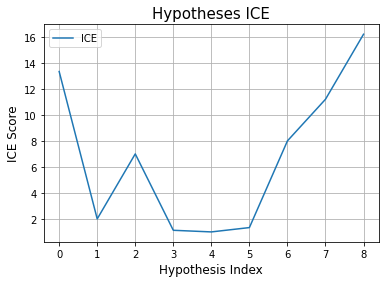

In [25]:
#plotting ICE

hypothesis.plot(y='ICE', use_index=True)
plt.title('Hypotheses ICE',fontdict={'size':15})
plt.xlabel('Hypothesis Index',fontdict={'size':12})
plt.ylabel('ICE Score',fontdict={'size':12})
plt.grid(True)
plt.legend() 

### 2. Apply the RICE framework to prioritize hypothesis. Sort them in descending order of priority.

In [26]:
#RICE
hypothesis['RICE']= (hypothesis['Impact'] * hypothesis['Reach'] * hypothesis['Confidence']) /hypothesis['Effort']

hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


<b>Insight:</b> 7, 2 , 0, 6, 8 were the top hypotheses with 0 and 6 having the same RICE score.  8 fell from 1st with ICE to the bottom of the top 5.  6 didn't change position, 7 and 0 are the only two that remained in teh top 3. 

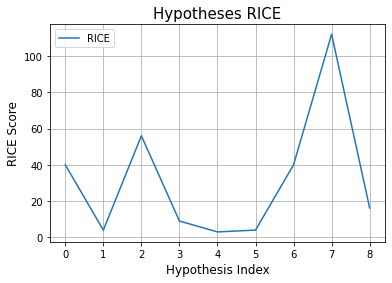

In [27]:
#Plotting RICE

hypothesis.plot(y='RICE', use_index=True)
plt.title('Hypotheses RICE',fontdict={'size':15})
plt.xlabel('Hypothesis Index',fontdict={'size':12})
plt.ylabel('RICE Score',fontdict={'size':12})
plt.grid(True)
plt.legend() 

Text(0.5, 0.98, 'Hypotheses ICE vs RICE Comparison Charts')

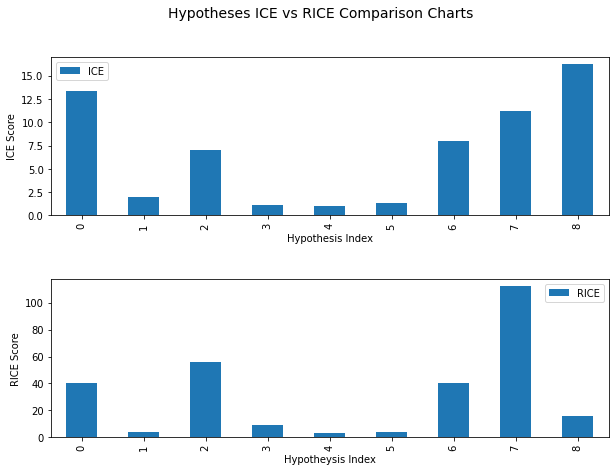

In [28]:
# Create a common figure for both with 2 columns and 1 row of subplots
figure, axes = plt.subplots(2, 1, figsize=(10, 7))
# make a little extra space between the subplots
figure.subplots_adjust(hspace=0.4)


# Create each subplot on the specified axes
IceHyp = hypothesis.plot(use_index=True, y="ICE", kind="bar", ax=axes[0])   
axes[0].set(xlabel="Hypothesis Index", ylabel="ICE Score", label="Hypothesis ICE Score")
   
RiceHyp = hypothesis.plot(use_index=True, y="RICE", kind="bar", ax=axes[1])
axes[1].set(xlabel="Hypotheysis Index", ylabel="RICE Score", label="Hypothesis RICE Score")

figure.suptitle('Hypotheses ICE vs RICE Comparison Charts', fontsize=14)

### Testing the Hypothesis that Proportions Are Equal

In [29]:
hypothesis[['Hypothesis','ICE', 'RICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE,RICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000,112.0
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000,40.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000,56.0
1,Launch your own delivery service. This will shorten delivery time,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,1.333333,4.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,1.000000,3.0


<b><h3> Conclusion for Prioritizing Hypotheses:</h3> </b> From both of the ICE and RICE plots, we get a better visual of how the two represent the hypotheses presented.  We can see that numbers 3, 4 and 5 can be dropped; they performed poorly on both spectrums. Changing the category structure(#3), background color(#4) and adding a customer review page(#5) would have no significant effects customer base or revenue.  These seem to be 'cosmetic' changes.  
<p>
The 5 Hypotheses that should be focused on are numbers 7, 0, 2, 6 and 8.  From those 5, the top three would be 7, 8 and 0. 
Hypothesis 7 maintained good standing in both ICE and RICE categories. Subscription forms are an excellent way to retain current visitors and give new visitors more insights into what the company is doing and has to offer. 
<p>
Promotional discounts(#8) and adding channels to bring in more traffic(#0) both garner focus in increasing customer base and revenue. Even though (#8) performed poorly in terms of RICE; it did so well in the ICE category that it brought it in line with the second best hypothesis(#0). Reaching more visitors and giving discounts have been proven industry actioons in increasing customer base and revenue potential.

# Part 2. A/B Test Analysis

You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
Task

<b>Analyze the A/B test:</b>

1. Graph cumulative revenue by group. Make conclusions and conjectures.
2. Graph cumulative average order size by group. Make conclusions and conjectures.
3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
7. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
8. Plot a scatter chart of order prices. Make conclusions and conjectures.
9. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
10. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
11. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
12. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
13. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

<b>Make a decision based on the test results. The possible decisions are:</b>
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

#### 1. Graph cumulative revenue by group. Make conclusions and conjectures.

In [30]:
# building an array with unique paired date-group values 

datesGroups = order_data[['date','group']].drop_duplicates()
datesGroups

,date,group
0,2019-08-15,B
8,2019-08-15,A
77,2019-08-16,A
79,2019-08-16,B
87,2019-08-01,A
...,...,...
1092,2019-08-12,A
1128,2019-08-13,B
1130,2019-08-13,A
1162,2019-08-14,B


In [31]:
#working with the visitors df
visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg(
        {'date' : 'max',
         'group' : 'max',
         'visits' : 'sum'
        }
    ),
    axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visits
87,2019-08-01,A,719
109,2019-08-01,B,713
242,2019-08-02,A,1338
239,2019-08-02,B,1294
353,2019-08-03,A,1845
...,...,...,...
611,2019-08-29,B,17708
845,2019-08-30,A,18037
758,2019-08-30,B,18198
999,2019-08-31,A,18736


In [32]:
#working with the orders df
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])
ordersAggregated

,date,group,transactionId,visitorId,revenue
87,2019-08-01,A,24,20,2356.8
109,2019-08-01,B,21,20,1620.0
242,2019-08-02,A,44,38,3860.3
239,2019-08-02,B,45,43,4243.8
353,2019-08-03,A,68,62,5675.5
...,...,...,...,...,...
611,2019-08-29,B,596,544,87343.0
845,2019-08-30,A,545,493,63563.5
758,2019-08-30,B,620,567,90736.3
999,2019-08-31,A,557,503,64554.9


In [33]:
# merging the two tables into one and giving its columns descriptive names
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders','buyers', 'revenue', 'visitors']

cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


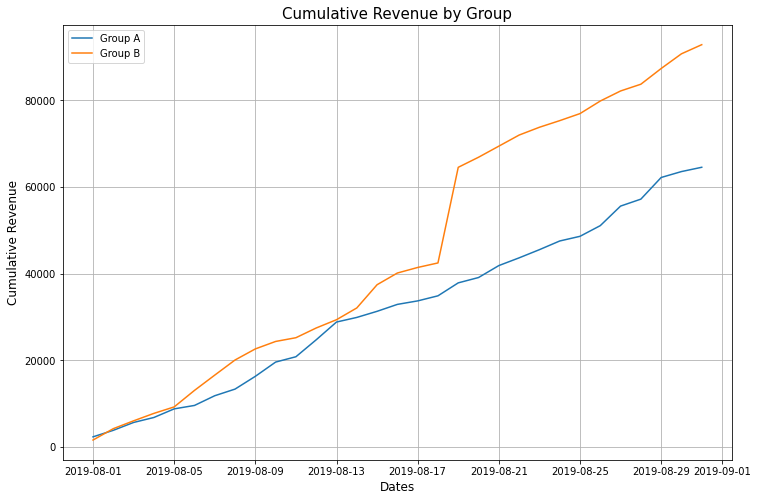

In [34]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12,8)) 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Group A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Group B')
plt.title('Cumulative Revenue by Group',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Cumulative Revenue',fontdict={'size':12})
plt.grid(True)
plt.legend() 

<b>Insight:</b>  Cumulative Revenue were similar until 2019-8-17 where Group B's revenue surpassed Group A. Group B is a good option here. 

### 2. Graph cumulative average order size by group. Make conclusions and conjectures.

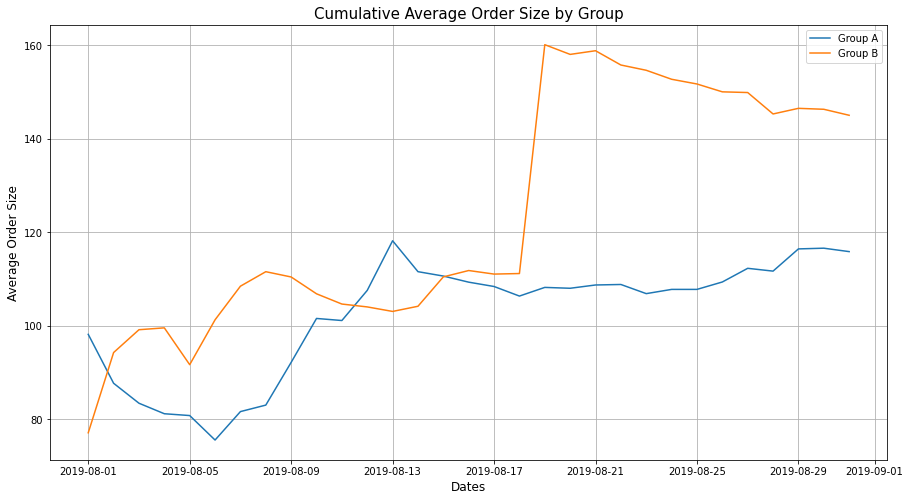

In [35]:

plt.figure(figsize=(15,8)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Group B')

plt.title('Cumulative Average Order Size by Group',fontdict={'size':15})
plt.xlabel('Dates',fontdict={'size':12})
plt.ylabel('Average Order Size',fontdict={'size':12})
plt.grid(True)
plt.legend() 


<b>Insight:</b> Once again Group B has exceeded Group A results and at the same time frame of 2019-8-17 which is where Group B spiked. After B's spike, it is slowing trending downward.  Group A, once it had reached it's peak at 2019-8-13, it seems to level off and stay constent. 

### 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

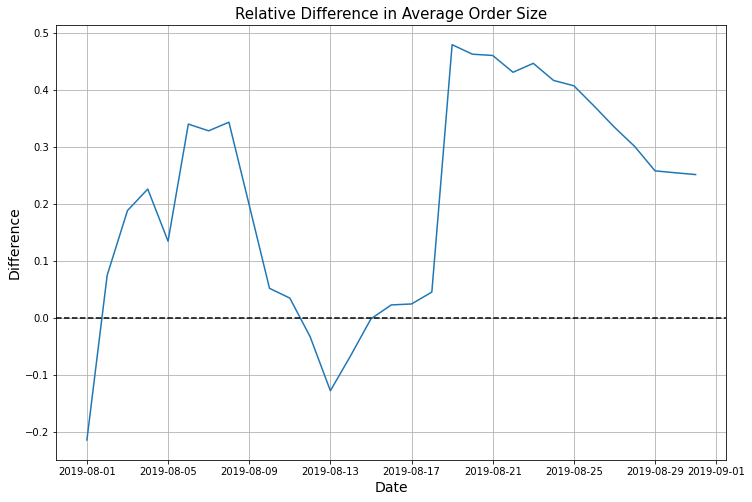

In [36]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.figure(figsize=(12,8)) 
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title("Relative Difference in Average Order Size", fontdict={'size':15})
plt.xlabel("Date", fontdict={'size':14})
plt.ylabel("Difference", fontdict={'size':14})
plt.grid(True)

#adding the x-axis
plt.axhline(y=0, color='black', linestyle='--')

<b>Insight:</b> There are 2 points where the difference between the segments spikes. There must be some abnormally large orders placed. This will be looked into further in the analysis process. 

### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [37]:
cumulativeData.head(2) #df overview

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713


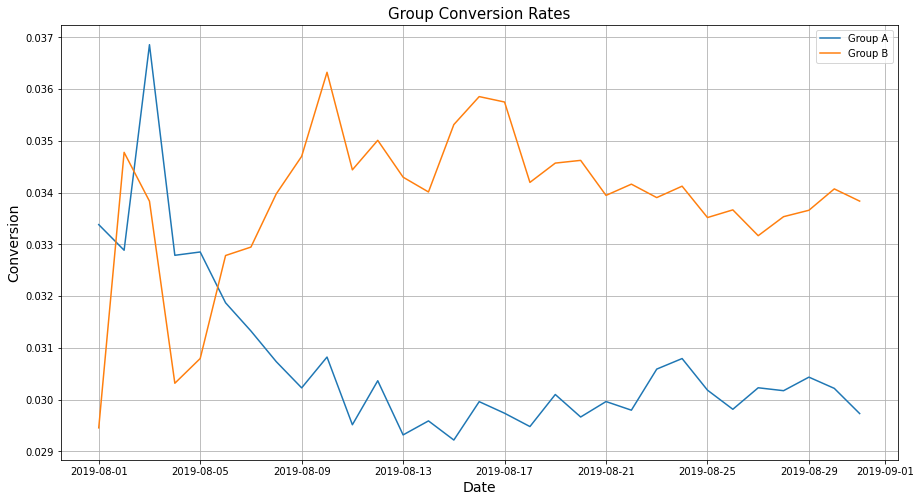

In [38]:
# calculating conversion rate
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data in group A 
cumulativeData_A = cumulativeData[cumulativeData['group']=='A']

# selecting data in group B
cumulativeData_B = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.figure(figsize=(15,8)) 
plt.plot(cumulativeData_A['date'], cumulativeData_A['conversion'], label='Group A')
plt.plot(cumulativeData_B['date'], cumulativeData_B['conversion'], label='Group B')
plt.title("Group Conversion Rates", fontdict={'size':15}) #fontdict adds text formatting
plt.xlabel("Date", fontdict={'size':14})
plt.ylabel("Conversion", fontdict={'size':14})
plt.grid(True)
plt.legend()

<b>Insight:</b> The beginning the graph fluctuates greatly but each group levels off for the most part with. Group B still has some significant spikes as compared to Group A. 

### 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [39]:
#Will use the original orders table to have all data available
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


To determine orders by users, we want a full and complete overview of the data.  Groups and revenue are irrelevant

In [40]:
orders_by_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1) #removing columns not used or relevant
    .groupby('visitorId', as_index=False) #method will group the orders by users
    .agg({'transactionId': pd.Series.nunique}) #method will calculate aggregated metrics on transaction ID which are unique
)

orders_by_users.columns = ['userId', 'orders']
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


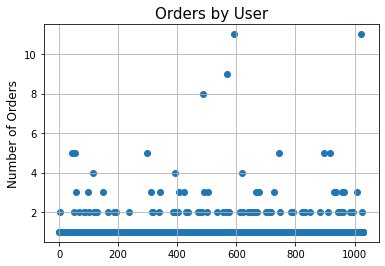

In [41]:
#Scatter plot
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders'])
plt.title("Orders by User", fontdict={'size':15})

plt.ylabel("Number of Orders", fontdict={'size':12})

plt.grid()

<b>Insight:</b> As determined early in the analysis process, there are order spikes as shown in the table and scatterplot. 4 orders have higher than normal order sizes with 2 orders almost maxing out. Two users have 11 orders which are shown clearly on the plot. 

### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [42]:
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 2., 4.])

No more than 5% of users placed more than 2 orders, and 10% of users made more than 1.

Thus, it would be reasonable to set 2 to 3 orders per user as the lower limit for the number of orders and to filter anomalies on that basis.

### 7. Plot a scatter chart of order prices. Make conclusions and conjectures.

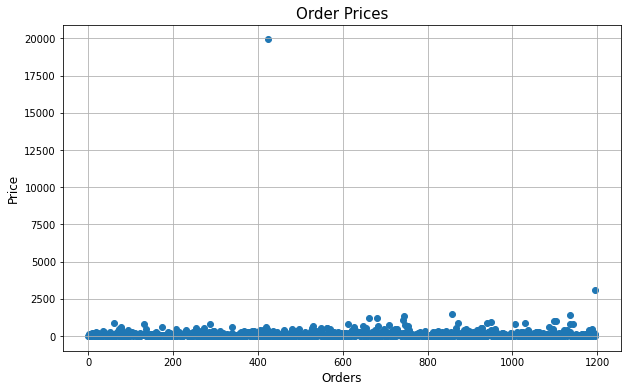

In [43]:
orders.sort_values(by='revenue',ascending=False).head(10)

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(10, 6)) 
plt.scatter(x_values, orders['revenue']) 
plt.title("Order Prices", fontdict={'size':15})
plt.xlabel("Orders", fontdict={'size':12})
plt.ylabel("Price", fontdict={'size':12})
plt.grid()

<b>Insight</b> Now we can see what the previous spikes have created. Large order volumns in two instances giving us our anomalies. One order is 20K and another one is slightly above 2.5K.  There are a few that are in range of 2.5K

### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [44]:
np.percentile(orders['revenue'], [90, 95, 99]).round()

array([282., 436., 901.])

<b>Insight:</b>

5% placed orders that cost more than 436 USD.

1% placed orders that cost more than 900 USD.

Orders outside of the 1% range can be considered anomalies. 

#### 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

We'll create the variables orders_userA and orders_usersB to store the columns ['userId', 'orders']. For users with at least one order, we'll indicate the number of orders made.

In [45]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [46]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [47]:
import scipy.stats as stats #library to work with mann whitney
from pandas.core.reshape.concat import concat # for finding the samples


orders_userA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_userA.columns = ['userId', 'orders']#visitorID to userID and transacId to orders

orders_usersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
orders_usersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([orders_userA['orders'],
                     pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits']
                                                                           .sum() - len(orders_userA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_usersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits']
                                                                           .sum() - len(orders_usersB['orders'])), name='orders')],axis=0)
# P VALUE
print("The P-Value is:","{0:.4f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
# RELATIVE GAIN for group 1
print("Group B's relative gain is:","{0:.4f}".format(sampleB.mean()/sampleA.mean()-1)) 



The P-Value is: 0.0168
Group B's relative gain is: 0.1381


<b>Null and Alternative Hypotheses.</b>  The Null hypothesis(H0) of a test always predicts no effect or no relationship between variables, while the Alternative hypothesis(H1) states your research prediction of an effect on the variables being tested.</b>

<blockquote>alpha = 0.05 significance level<p>

H0 = "There is no significant difference in the groups using the raw data."

H1 = "There is significant difference in the groups using the raw data."</blockquote>

In [48]:
#null and alternative hypotheses testing

alpha = .05 #significance level

result_grp = stats.mannwhitneyu(sampleA, sampleB)

print('P-value: ','{0:.4f}'.format(result_grp.pvalue))

if (result_grp.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 


P-value:  0.0168
Null hypothesis rejected: the difference is statistically significant


<b>Insight:</b> The first value is P-value which is smaller than 0.05 so we can reject null hypothesis. The relative conversion gain for Group B compared to Group A is 13.8%. The raw data analysis has shown that there is a difference between the two groups.

### 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.


In [49]:
# P VALUE
print("The P-Value is:",'{0:.4f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]))

# RELATIVE GAIN for group B
print("Group B's relative gain is:",'{0:.4f}'.format(orders[orders['group']=='B']['revenue'].
                       mean()/orders[orders['group']=='A']['revenue'].mean()-1))

The P-Value is: 0.6915
Group B's relative gain is: 0.2517


<b>Null and Alternative Hypotheses</b>

<blockquote>alpha = 0.05 significance level
 <p>   

H0 = "There is no significant difference in average order size between the groups using the raw data."

H1 = "There is significant difference in average order size between the groups using the raw data."</blockquote>

In [50]:
##null and alternative hypotheses testing

alpha = .05 #significance level

#renames the PValue from above so easier to do comparison.
results_OS = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'],
                                          orders[orders['group']=='B']['revenue'])[1]

print('pvalue:','{0:.4f}'.format(results_OS))#Prints the PValue from above.
print()

if (results_OS > alpha):
    print('Failed to reject null hypothesis: we can not make conclusions about the difference.')
else:
    print('Null hypothesis rejected: the difference is statisticaly significant.')

pvalue: 0.6915

Failed to reject null hypothesis: we can not make conclusions about the difference.


<b>*Insight:</b>The P-value is greater than .05. The p-value is considerably higher than 0.05, so failed to reject the null hypothesis, thus no conclusions can be made on differences. 


### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [51]:
usersWithManyOrders = pd.concat([orders_userA[orders_userA['orders'] > 2]['userId'], #more than 2 orders for A
                                 orders_usersB[orders_usersB['orders'] > 2]['userId']], #more than 2 orders for BB
                                axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 2000]['visitorId'] #will use orders over 2000 dollars

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders],
                          axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("There are:",abnormalUsers.shape, "anomalous users.")

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
dtype: int64
There are: (22,) anomalous users.


I got 22 anomalous users. Now to find out how their actions affected the test results. We'll calculate the <b>statistical significance of the differences in conversion between the groups, using filtered data.</b>

Now prepare samples of the number of orders per user for each test group.

In [52]:
sampleAFiltered = pd.concat([orders_userA[np.logical_not(orders_userA['userId'] \
                  .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'] \
                  .sum() - len(orders_userA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([orders_usersB[np.logical_not(orders_usersB['userId'] \
                 .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'] \
                 .sum() - len(orders_usersB['orders'])),name='orders')],axis=0) 

Applying the statistical Mann-Whitney criterion to the resulting samples.

In [53]:
print("{0:.4f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.4f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.0136
0.1660


<b>Null and Alternative Hypotheses</b>

<blockquote>alpha = 0.05 significance level
 <p>   

H0 = "There is no significant difference between the groups using filtered data."

H1 = "There is significant difference between the groups using filtered data."</blockquote>

In [54]:
#null and alternative hypotheses testing
alpha = .05 #significance level

result_grp2 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('P-value: ','{0:.4f}'.format(result_grp2.pvalue))

if (result_grp2.pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 


P-value:  0.0136
Null hypothesis rejected: the difference is statistically significant


*With the hypothese rejected, removing the differences still resulted in group difference.

### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [55]:
print('{0:.4f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("Group B's relative gain is:",'{0:.4f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.6347
Group B's relative gain is: -0.0979


<b>Null and Alternative Hypotheses</b>

<blockquote>alpha = 0.05 significance level
 <p>   

H0 = "There is no significant difference in average order size using filtered data."

H1 = "There is significant difference in average order size using filtered data."</blockquote>

In [56]:
##null and alternative hypotheses testing

alpha = .05 #significance level

#renames the PValue from above so easier to do comparison.
fos = stats.mannwhitneyu(orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

print('pvalue:','{0:.4f}'.format(fos))#Prints the PValue from above.
print()

if (fos > alpha):
    print('Failed to reject null hypothesis: we can not make conclusions about the difference.')
else:
    print('Null hypothesis rejected: the difference is statisticaly significant.')

pvalue: 0.6347

Failed to reject null hypothesis: we can not make conclusions about the difference.


 *P value has changed and also failed to reject hypothesis again, no conlusion from difference on this.

<b> Insight:</b> Now that the anomalies have been removed, we can see how much things have changed. Between the groups with raw data was 13.8% with the filtered data it is now 16.8% a difference of 3%; not a significant diference but still there. 

On average order size with the raw data it was 25.2% and with the filtered data which removed the anomalies of the atypical orders sizes, Group B is in the negative. It just shows how much the atypical orders helped Group B out.  

<b><h3> Conclusion for A/B Analysis:</b></h3> 
Although our general conclusions from the test didn't change, using the raw vs filtered data examples demonstrates clearly how anomalies can affect A/B test results. All it takes is 2-5 huge orders to skew the comparsion between the groups. 

Between the raw and filtered, Group B showed gains on Group A except were the order size was concerend. Removing the abnormally large orders, which caused the massive spike in the plot for 'Average Order size' for Group B, negated Group B's gain that it had on Group A in that category. 

Based on the overall results, I would suggest ending the test and going with Group B. Despite Group B's anomalies, they still garned the large orders from a few visitors which boosted the Groups revenue. It's obvious that the tested hypotheses of numbers 7, 0 and 8 really resonated with Group B